In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semantic-segmentation-drone-dataset/colormaps.xlsx
/kaggle/input/semantic-segmentation-drone-dataset/classes_dict.txt
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/173.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/491.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/043.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/248.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/038.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/480.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/236.png
/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/la

In [2]:
#here we check all the files in  a particular folder 
import os

folder_path = "/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic"
folder_path1 = "/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/original_images"
# List all files and directories
all_files = os.listdir(folder_path)
all_files1 = os.listdir(folder_path1)

for i in range(len(all_files)):
    all_files[i] = "/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/" + all_files[i]
    all_files1[i] = "/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/original_images/" + all_files1[i]
    
print(all_files[0])
print(len(all_files1))




/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/label_images_semantic/173.png
400


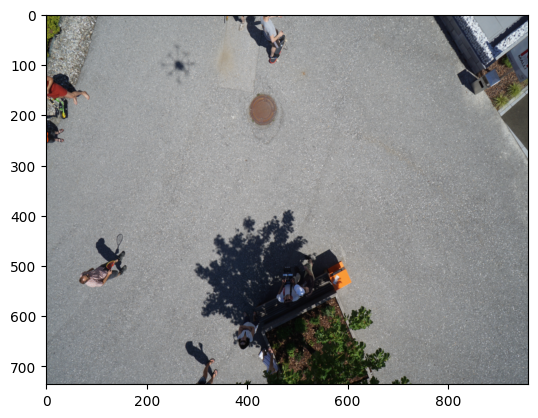

In [3]:
import cv2
import matplotlib.pyplot as plt
# Load the image
image_path = "/kaggle/input/semantic-segmentation-drone-dataset/classes_dataset/classes_dataset/original_images/000.png"
image = plt.imread(image_path)


# Display the image (optional)
plt.imshow(image)



In [4]:
#now lets get the image associated with the image path 
def get_image(files_list):
    final_list = []
    for i in range(len(files_list)):
        image_path = files_list[i]
        image = plt.imread(image_path)
        final_list.append(image)
    return final_list
        
        
    

In [5]:
#now lets prepare the data 
import numpy as np
original_list = get_image(all_files1)
semantic_list = get_image(all_files)

#now we have got the image list , lets typecast them into numpy array 
original_array = np.asarray(original_list)
semantic_array  = np.asarray(semantic_list)


print(semantic_array[0].shape)

(736, 960, 4)


In [6]:
reduced_semantic_array = []
for i in range(len(semantic_array)):
   k = semantic_array[i][:,:,:3]
   reduced_semantic_array.append(k)

reduced_semantic_array = np.asarray(reduced_semantic_array)

print(reduced_semantic_array[1].shape)

(736, 960, 3)


In [7]:
#we denormalize the semantic m
#here we can see that the array is normalized in order to denormalize we multiply by 255.0
denormalized_semantic_image = np.asarray([(reduced_semantic_array[i]*255).astype("uint8") for i in range(len(original_array))])

print(denormalized_semantic_image[0].shape)

(736, 960, 3)


In [8]:
print(denormalized_semantic_image[1])

[[[155  38 182]
  [155  38 182]
  [155  38 182]
  ...
  [124 252   0]
  [124 252   0]
  [124 252   0]]

 [[155  38 182]
  [169 169 169]
  [169 169 169]
  ...
  [124 252   0]
  [124 252   0]
  [124 252   0]]

 [[155  38 182]
  [169 169 169]
  [169 169 169]
  ...
  [124 252   0]
  [124 252   0]
  [124 252   0]]

 ...

 [[155  38 182]
  [169 169 169]
  [169 169 169]
  ...
  [169 169 169]
  [169 169 169]
  [155  38 182]]

 [[155  38 182]
  [169 169 169]
  [169 169 169]
  ...
  [169 169 169]
  [169 169 169]
  [155  38 182]]

 [[155  38 182]
  [155  38 182]
  [155  38 182]
  ...
  [155  38 182]
  [155  38 182]
  [155  38 182]]]


In [9]:
print(original_array[1])

[[[0.4862745  0.49411765 0.49411765]
  [0.4862745  0.48235294 0.49411765]
  [0.4862745  0.49411765 0.49803922]
  ...
  [0.2        0.18039216 0.14117648]
  [0.1882353  0.16862746 0.13725491]
  [0.20784314 0.19215687 0.16470589]]

 [[0.47843137 0.48235294 0.4862745 ]
  [0.49019608 0.49803922 0.49411765]
  [0.5019608  0.5137255  0.50980395]
  ...
  [0.21960784 0.19215687 0.16078432]
  [0.19607843 0.1764706  0.14901961]
  [0.1882353  0.17254902 0.15686275]]

 [[0.4745098  0.4745098  0.48235294]
  [0.4862745  0.49019608 0.49019608]
  [0.49803922 0.5137255  0.5019608 ]
  ...
  [0.19607843 0.1764706  0.15294118]
  [0.18431373 0.16470589 0.14117648]
  [0.16078432 0.14901961 0.14509805]]

 ...

 [[0.28627452 0.29411766 0.34117648]
  [0.31764707 0.32156864 0.34901962]
  [0.29411766 0.29803923 0.34117648]
  ...
  [0.30588236 0.24313726 0.21176471]
  [0.29411766 0.23921569 0.20392157]
  [0.28627452 0.23137255 0.2       ]]

 [[0.28235295 0.28627452 0.34117648]
  [0.28627452 0.30980393 0.34901962]


In [10]:
#here we can see that the array is normalized in order to denormalize we multiply by 255.0
denormalized_original_image = np.asarray([(original_array[i]*255).astype("uint8") for i in range(len(original_array))])

print(len(denormalized_original_image))

400


In [11]:
print(denormalized_original_image[0].shape)

(736, 960, 3)


In [12]:
#now we have denormalized the image . 
#next we now try to build the unet model , infused with attention 
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, UpSampling2D, GlobalAveragePooling2D, AveragePooling2D, 
    Dense, Concatenate, Input, Multiply
)
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model

class TeacherNetwork:
    def __init__(self, weight, reduction_amount):
        self.activation = "relu"
        self.padding = "same"
        self.kernel_size = (3, 3)
        self.weight = weight  # Importance given to avg pooling
        self.reduction_amount = reduction_amount

    def encoder_layer(self, filters, last_layer):
        output1 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(last_layer)
        output2 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(output1)
        batchnorm4 = BatchNormalization()(output2)
        maxpool_layer = MaxPooling2D()(batchnorm4)
        return output2, maxpool_layer

    def decoder_layer(self, filters, last_layer):
        output1 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(last_layer)
        batchnorm3= BatchNormalization()(output1)
        output2 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(batchnorm3)
        upsample_layer = UpSampling2D(size=(2,2), interpolation="bilinear")(output2)
        return upsample_layer

    def channel_attention_layer(self, input_tensor, filters):
        pooled_tensor = MaxPooling2D()(input_tensor)
        avg_pool = GlobalAveragePooling2D()(pooled_tensor)

        
        avg_pool1= AveragePooling2D((2,2))(input_tensor)
        batchnorm =BatchNormalization()(avg_pool1)
        avg_pool2 = GlobalAveragePooling2D()(batchnorm)

        addition_layer = (1 - self.weight) * avg_pool2 + (self.weight) * avg_pool

        dense_layer = Dense(filters, activation="relu")(addition_layer)
        batchnorm2 = BatchNormalization()(dense_layer)
        dense_layer1 = Dense(filters // self.reduction_amount, activation="relu")(batchnorm2)
        dense_layer2 = Dense(filters, activation="sigmoid")(dense_layer1)


        dense_layer2 = tf.keras.layers.Reshape((1, 1, filters))(dense_layer2)
        
        output_filters = Multiply()([input_tensor, dense_layer2])
        return output_filters

    def spatial_attention_layer(self, input_tensor, filters):
        input_tensor1 = self.channel_attention_layer(input_tensor, filters)

        maxpool_tensor = MaxPooling2D((2, 2))(input_tensor1)
        average_tensor = AveragePooling2D((2, 2))(input_tensor1)

        # Adjust importance
        average_tensor = self.weight * average_tensor
        maxpool_tensor = (1 - self.weight) * maxpool_tensor

        concatenated_filters = Concatenate(axis=-1)([average_tensor, maxpool_tensor])
        convolution_filter = Conv2D(filters, (3,3), padding="same", activation="relu")(concatenated_filters)
        batchnorm5 = BatchNormalization()(convolution_filter)
        convolution_filter2 = Conv2D(1, (3,3), padding="same", activation="sigmoid")(batchnorm5)
        batchnorm6 = BatchNormalization()(convolution_filter2)

        upsampled_filter = UpSampling2D((2,2))(batchnorm6)
        
        spatial_filter = Multiply()([input_tensor1, upsampled_filter])
        return spatial_filter

    def attention_block(self, input_tensor, filters):
        return self.spatial_attention_layer(input_tensor, filters)

    def build_model(self, input_shape):
        inputs = Input(shape=input_shape)
        
        enc1, pool1 = self.encoder_layer(16, inputs)
        enc2, pool2 = self.encoder_layer(32, pool1)
        enc3, pool3 = self.encoder_layer(64, pool2)
        enc4, pool4 = self.encoder_layer(96, pool3)
        enc5, pool5 = self.encoder_layer(96, pool4)
        enc6, _ = self.encoder_layer(128, pool5)

        att1 = self.attention_block(enc1, 16)
        att2 = self.attention_block(enc2, 32)
        att3 = self.attention_block(enc3, 64)
        att4 = self.attention_block(enc4, 96)
        att5 = self.attention_block(enc5, 96)

        dec6 = self.decoder_layer(96, enc6)
        concat5 = Concatenate(axis=-1)([att5, dec6])
        dec5 = self.decoder_layer(96, concat5)

        concat4 = Concatenate(axis=-1)([att4, dec5])
        dec4 = self.decoder_layer(64, concat4)

        concat3 = Concatenate(axis=-1)([att3, dec4])
        dec3 = self.decoder_layer(32, concat3)


        concat2 = Concatenate(axis=-1)([att2, dec3])
        dec2 = self.decoder_layer(16, concat2)

        concat1 = Concatenate(axis=-1)([att1, dec2])
        batchnorm11 = BatchNormalization()(concat1)
        output_tensor1 = Conv2D(8, (3, 3), activation=self.activation, padding=self.padding)(batchnorm11)
        batchnorm12 = BatchNormalization()(output_tensor1)
        output_tensor2 = Conv2D(3, (3, 3), activation="sigmoid", padding=self.padding)(batchnorm12)

        return Model(inputs, [output_tensor2,output_tensor2])

In [13]:
#after creating the class , lets now create an object 
teacher_unet = TeacherNetwork(0.4,4)
teacher_model = teacher_unet.build_model((736,960,3))
teacher_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 736, 960, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 736, 960, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 736, 960, 16)   │          2,320 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 736, 960, 16)   │             64 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 368, 480, 16)   │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 368, 480, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 368, 480, 32)   │          9,248 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 368, 480, 32)   │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 184, 240, 32)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 184, 240, 64)   │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 184, 240, 64)   │         36,928 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 184, 240, 64)   │            256 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 92, 120, 64)    │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 92, 120, 96)    │         55,392 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 92, 120, 96)    │         83,040 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 92, 120, 96)    │            384 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 1,759,704 (6.71 MB)

 Trainable params: 1,756,574 (6.70 MB)

 Non-trainable params: 3,130 (12.23 KB)

In [14]:
import tensorflow as tf
import keras.backend as K

def iou_loss(y_true, y_pred, smooth=1e-6):
    """
    IoU Loss for semantic segmentation.

    Args:
        y_true: Ground truth labels, shape (batch_size, height, width, channels).
        y_pred: Predicted labels, shape (batch_size, height, width, channels).
        smooth: Smoothing factor to avoid division by zero.

    Returns:
        IoU loss value.
    """
    # Cast both arrays to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    # Flatten the arrays
    y_true_flat = tf.keras.backend.flatten(y_true)
    y_pred_flat = tf.keras.backend.flatten(y_pred)

    # Calculate intersection and union
    intersection = tf.keras.backend.sum(y_true_flat * y_pred_flat)
    union = tf.keras.backend.sum(y_true_flat) + tf.keras.backend.sum(y_pred_flat) - intersection

    # IoU score
    iou_score = (intersection + smooth) / (union + smooth)
    iou_score = tf.clip_by_value(iou_score, 0.0, 1.0)


    # IoU Loss
    return 1 - iou_score


def iou_score(y_true, y_pred, smooth=1e-6):
    """
    IoU Loss for semantic segmentation.

    Args:
        y_true: Ground truth labels, shape (batch_size, height, width, channels).
        y_pred: Predicted labels, shape (batch_size, height, width, channels).
        smooth: Smoothing factor to avoid division by zero.

    Returns:
        IoU loss value.
    """
    # Cast both arrays to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    # Flatten the arrays
    y_true_flat = tf.keras.backend.flatten(y_true)
    y_pred_flat = tf.keras.backend.flatten(y_pred)

    # Calculate intersection and union
    intersection = tf.keras.backend.sum(y_true_flat * y_pred_flat)
    union = tf.keras.backend.sum(y_true_flat) + tf.keras.backend.sum(y_pred_flat) - intersection

    # IoU score
    iou_score = (intersection + smooth) / (union + smooth)
    iou_score = tf.clip_by_value(iou_score, 0.0, 1.0)



    # IoU Loss
    return iou_score


In [15]:
def dice_loss(y_true, y_pred, smooth=1e-6):
    """
    Dice Loss for semantic segmentation.

    Args:
        y_true: Ground truth labels, shape (batch_size, height, width, channels).
        y_pred: Predicted labels, shape (batch_size, height, width, channels).
        smooth: Smoothing factor to avoid division by zero.

    Returns:
        Dice loss value.
    """
    # Cast both arrays to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    # Flatten the arrays
    y_true_flat = tf.keras.backend.flatten(y_true)
    y_pred_flat = tf.keras.backend.flatten(y_pred)

    # Calculate intersection and sum
    intersection = tf.keras.backend.sum(y_true_flat * y_pred_flat)
    dice_coeff = (2 * intersection + smooth) / (tf.keras.backend.sum(y_true_flat) + tf.keras.backend.sum(y_pred_flat) + smooth)

    # Dice Loss
    return 1 - dice_coeff
    
def dice_score(y_true, y_pred, smooth=1e-6):
    """
    Dice Loss for semantic segmentation.

    Args:
        y_true: Ground truth labels, shape (batch_size, height, width, channels).
        y_pred: Predicted labels, shape (batch_size, height, width, channels).
        smooth: Smoothing factor to avoid division by zero.

    Returns:
        Dice loss value.
    """
    # Cast both arrays to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    # Flatten the arrays
    y_true_flat = tf.keras.backend.flatten(y_true)
    y_pred_flat = tf.keras.backend.flatten(y_pred)

    # Calculate intersection and sum
    intersection = tf.keras.backend.sum(y_true_flat * y_pred_flat)
    dice_coeff = (2 * intersection + smooth) / (tf.keras.backend.sum(y_true_flat) + tf.keras.backend.sum(y_pred_flat) + smooth)

    # Dice Loss
    return  dice_coeff


In [16]:
#now we will try to train the attention infused unet model with the data 
#for this we will try to use the iou and the dice score as the metrics
from keras.optimizers import Adam 
teacher_model.compile(metrics = [iou_score,dice_score],optimizer= Adam(learning_rate = 0.001),loss = [iou_loss,dice_loss])

In [26]:
#now lets partition the data 
first_training = denormalized_original_image[200:400]
first_training_semantic = denormalized_semantic_image[200:400]

second_training = denormalized_original_image[:100]
second_training_semantic = denormalized_semantic_image[:100]

validation_set_original = denormalized_original_image[100:200]
validation_set_semantic = denormalized_semantic_image[100:200]




In [27]:
#now lets fit the model 
history = teacher_model.fit(first_training,first_training_semantic,validation_data = (validation_set_original,validation_set_semantic),verbose = 1 , batch_size = 5, epochs = 10)



Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - conv2d_33_iou_score: 1.0000 - loss: 0.0000e+00 - val_conv2d_33_iou_score: 0.9971 - val_loss: 0.0029
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 603ms/step - conv2d_33_iou_score: 1.0000 - loss: 0.0000e+00 - val_conv2d_33_iou_score: 0.9979 - val_loss: 0.0021
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 598ms/step - conv2d_33_iou_score: 1.0000 - loss: 0.0000e+00 - val_conv2d_33_iou_score: 0.9982 - val_loss: 0.0018
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 607ms/step - conv2d_33_iou_score: 1.0000 - loss: 0.0000e+00 - val_conv2d_33_iou_score: 0.9983 - val_loss: 0.0017
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 610ms/step - conv2d_33_iou_score: 1.0000 - loss: 0.0000e+00 - val_conv2d_33_iou_score: 0.9984 - val_loss: 0.0016
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 603ms/step - conv2d_33_iou_score: 1.0000 - loss: 0.0000e+00 - val_conv2d_33_iou_score: 0.9984 - val_loss: 0.0016
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 604ms/step - conv2d_33_iou_sco

In [32]:
l = np.expand_dims(second_training[0], axis=0)
prediction = teacher_model.predict(l)
print(type(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
<class 'list'>


In [33]:
#now lets get the predictions of teacher model 
predictions_list = []
for i in range(len(second_training)):
    l = np.expand_dims(second_training[i],axis= 0)
    print(l.shape)
    prediction = teacher_model.predict(l)
    prediction = np.asarray(prediction)
    print(prediction.shape)
    predictions_list.append(prediction[0])

predictions_list = np.asarray(predictions_list)
#now after getting the predictions , we now train the student model 
#now we will try to train the attention infused unet model with the data 
#for this we will try to use the iou and the dice score as the metrics
print(predictions_list[1].shape)

(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(2, 1, 736, 960, 3)
(1, 736, 960, 3)
1/1 ━━━━

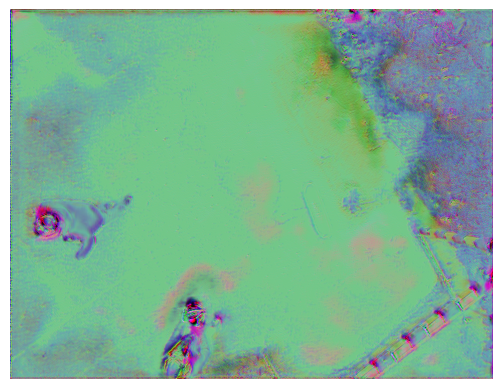

In [39]:
#lets see one predeiction
l = predictions_list[1]

l  = np.squeeze(l)

plt.imshow(l)
plt.axis("off")

plt.show()

#now lets plot the model 




In [41]:
#now lets create the student model 
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

# Now we have created the Teacher UNet model; next, we will create the Student model
class StudentNetwork(TeacherNetwork):
    def __init__(self):
        self.activation = 'relu'
        self.padding = 'same'
        self.kernel_size = (3,3)
    
    def spatial_pyramid_pooling(self, input_tensor, input_channel):
        '''
        In spatial pyramid pooling we try to take various pooled features and then we upsample them 
        to get a better representation of smaller features here we take arious scaled features 
        Here we take 4 pooled features each of different kernel size 
        in the paper they applied average pooling here we do the same 
        the function will return the pooled features upsampled concatenated with the original feature map 
        here the number of channels does not change
        '''
        average_feature1 = AveragePooling2D((1,1))(input_tensor) 
        average_feature2 = AveragePooling2D((2,2))(input_tensor)
        average_feature3 = AveragePooling2D((4,4))(input_tensor)
        average_feature4 = AveragePooling2D((8,8))(input_tensor)

        upsampled_feature2 = UpSampling2D((2,2), interpolation='nearest')(average_feature2)
        upsampled_feature3 = UpSampling2D((4,4), interpolation='nearest')(average_feature3)
        upsampled_feature4 = UpSampling2D((8,8), interpolation='nearest')(average_feature4)
        
        # Concatenating features
        output_feature = Concatenate(axis=-1)([input_tensor, upsampled_feature2, upsampled_feature3, upsampled_feature4])
        
        # Normalize channels after concatenation
        output_feature1 = Conv2D(input_channel, self.kernel_size, padding=self.padding, activation=self.activation)(output_feature)
        return output_feature1

    def build_model1(self, input_shape):
        input1 = Input(shape=input_shape)
        
        conv_layer1 = Conv2D(1, self.kernel_size, padding=self.padding, activation=self.activation)(input1)
        encoder_layer1 = super().encoder_layer(16, conv_layer1)
        encoder_layer2 = super().encoder_layer(32, encoder_layer1[1])
        encoder_layer3 = super().encoder_layer(64, encoder_layer2[1])
        encoder_layer4 = super().encoder_layer(128, encoder_layer3[1])

        spp_layer1 = self.spatial_pyramid_pooling(encoder_layer1[0], 16)
        spp_layer2 = self.spatial_pyramid_pooling(encoder_layer2[0], 32)
        spp_layer3 = self.spatial_pyramid_pooling(encoder_layer3[0], 64)

        # Decoder
        decoder_layer4 = super().decoder_layer(64, encoder_layer4[0])
        concatenate_layer = Concatenate(axis=-1)([spp_layer3, decoder_layer4])
        
        decoder_layer3 = super().decoder_layer(32, concatenate_layer)
        concatenate_layer2 = Concatenate(axis=-1)([spp_layer2, decoder_layer3])
        
        decoder_layer2 = super().decoder_layer(16, concatenate_layer2)
        concatenate_layer1 = Concatenate(axis=-1)([spp_layer1, decoder_layer2])
        
        # Final Convolution layers
        conv_1 = Conv2D(10, self.kernel_size, padding=self.padding, activation=self.activation)(concatenate_layer1)
        output_image = Conv2D(3, self.kernel_size, padding=self.padding, activation="sigmoid")(conv_1)
        
        # Building model
        student_model = Model(inputs=input1, outputs=output_image)
        return student_model

In [42]:
#now lets create an object of the student network class 
import tensorflow as tf


student_network = StudentNetwork()
student_model = student_network.build_model1((736,960,3))
student_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 736, 960, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_54 (Conv2D)        │ (None, 736, 960, 1)    │             28 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 736, 960, 16)   │            160 │ conv2d_54[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 736, 960, 16)   │          2,320 │ conv2d_55[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_40    │ (None, 736, 960, 16)   │             64 │ conv2d_56[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_20          │ (None, 368, 480, 16)   │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 368, 480, 32)   │          4,640 │ max_pooling2d_20[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 368, 480, 32)   │          9,248 │ conv2d_57[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_41    │ (None, 368, 480, 32)   │            128 │ conv2d_58[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_21          │ (None, 184, 240, 32)   │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 184, 240, 64)   │         18,496 │ max_pooling2d_21[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 184, 240, 64)   │         36,928 │ conv2d_59[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_42    │ (None, 184, 240, 64)   │            256 │ conv2d_60[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_22          │ (None, 92, 120, 64)    │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 92, 120, 128)   │         73,856 │ max_pooling2d_22[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 92, 120, 128)   │        147,584 │ conv2d_61[0][0]        │
├──────────────────────

 Total params: 659,383 (2.52 MB)

 Trainable params: 658,935 (2.51 MB)

 Non-trainable params: 448 (1.75 KB)

In [43]:
#now lets compile the student model 
#now we will try to train the attention infused unet model with the data 
#for this we will try to use the iou and the dice score as the metrics
from keras.optimizers import Adam 
student_model.compile(metrics = [iou_score,dice_score],optimizer= Adam(learning_rate = 0.001),loss = iou_loss)

In [ ]:
#now lets fit the data to the student model 
student_model.fit(second_training,predictions_list,verbose = 1, epochs = 10, batch_size = 4)
